In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Data Exploratory for Heart Failure Clinical Records

In [3]:
#Retrieve Data from heart failure clinical records
heartdf = pd.read_csv(r"datasets\Heart Failure Clinical Records\data.csv")
heartdf.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
heartdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


To find out what factors affect the Death_Events. <br>
Based on intuitive, we would say age, diabetes, high_blood_pressure, serum_creatinine, smoking and serum_sodium would have some factors in affecting death.

In [5]:
heartdf["DEATH_EVENT"].describe()

count    299.00000
mean       0.32107
std        0.46767
min        0.00000
25%        0.00000
50%        0.00000
75%        1.00000
max        1.00000
Name: DEATH_EVENT, dtype: float64

Distribution of DEATH_EVENTS from heart disease

0    203
1     96
Name: DEATH_EVENT, dtype: int64


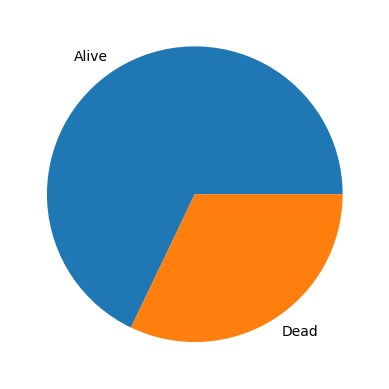

In [6]:
print(heartdf["DEATH_EVENT"].value_counts())
plt.pie(heartdf['DEATH_EVENT'].value_counts(), labels = ["Alive" , "Dead"])
plt.show()

In [7]:
heartdf["age"].describe()

count    299.000000
mean      60.833893
std       11.894809
min       40.000000
25%       51.000000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64

Distribution of patients age with heart disease

<AxesSubplot: xlabel='age', ylabel='Count'>

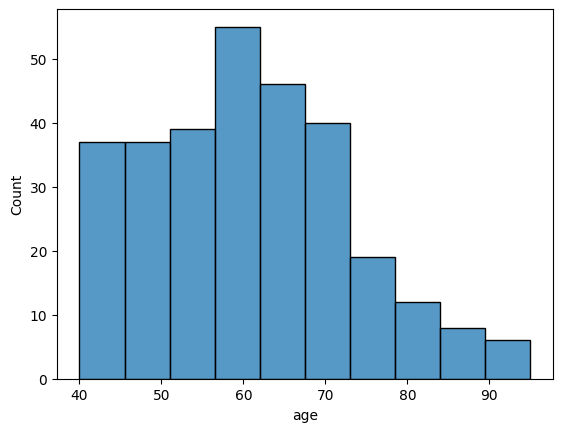

In [8]:
sns.histplot(heartdf["age"])

In [9]:
heartdf["serum_creatinine"].describe()

count    299.00000
mean       1.39388
std        1.03451
min        0.50000
25%        0.90000
50%        1.10000
75%        1.40000
max        9.40000
Name: serum_creatinine, dtype: float64

Distribution of serum_creatinine levels of patients

<AxesSubplot: >

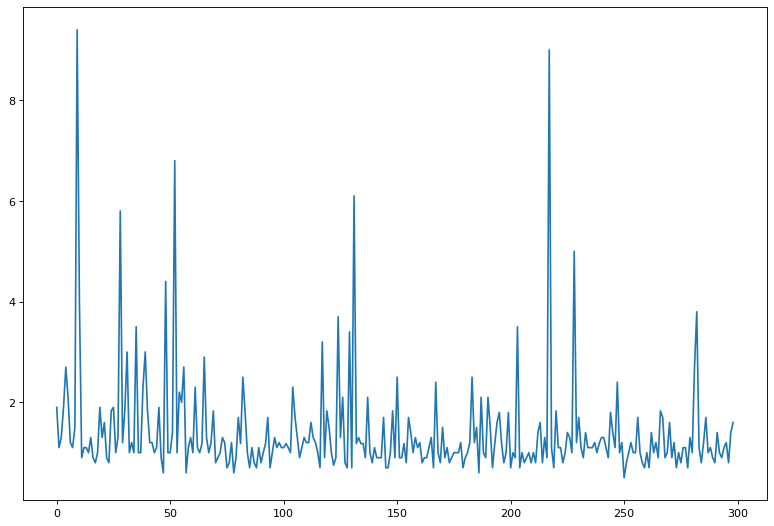

In [10]:
plt.figure(figsize = (12,8), dpi = 80)
heartdf["serum_creatinine"].plot(kind="line")

In [11]:
heartdf["high_blood_pressure"].describe()

count    299.000000
mean       0.351171
std        0.478136
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: high_blood_pressure, dtype: float64

Distribution of patients with high blood pressure

0    194
1    105
Name: high_blood_pressure, dtype: int64


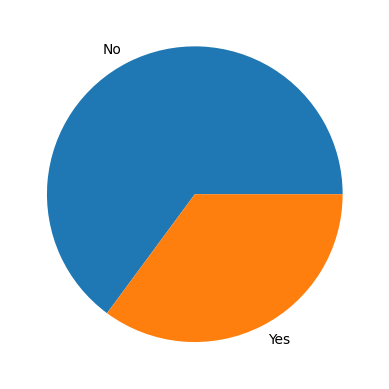

In [12]:
print(heartdf["high_blood_pressure"].value_counts())
plt.pie(heartdf['high_blood_pressure'].value_counts(), labels = ["No" , "Yes"])
plt.show()

In [13]:
heartdf["smoking"].describe()

count    299.00000
mean       0.32107
std        0.46767
min        0.00000
25%        0.00000
50%        0.00000
75%        1.00000
max        1.00000
Name: smoking, dtype: float64

Distribution of patients who smokes

0    203
1     96
Name: smoking, dtype: int64


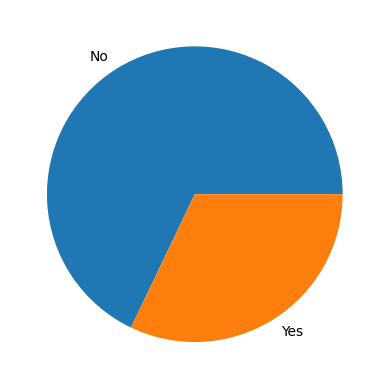

In [14]:
print(heartdf["smoking"].value_counts())
plt.pie(heartdf['smoking'].value_counts(), labels = ["No" , "Yes"])
plt.show()

In [15]:
def data_relationship(factor1, factor2):
    data_temp = heartdf.copy()
    data_temp= data_temp[(data_temp[factor1] == 1)]
    return data_temp[factor2].value_counts()
   

In [16]:
var = "high_blood_pressure"
data = pd.concat([heartdf["age"], heartdf[var]], axis = 1)
data

,age,high_blood_pressure
0,75.0,1
1,55.0,0
2,65.0,0
3,50.0,0
4,65.0,0
...,...,...
294,62.0,1
295,55.0,0
296,45.0,0
297,45.0,0


In [17]:
data_relationship("high_blood_pressure", "age")

70.000    13
50.000    10
60.000     9
65.000     8
75.000     7
45.000     5
72.000     5
55.000     4
49.000     3
58.000     3
62.000     3
53.000     3
80.000     3
68.000     2
59.000     2
66.000     2
63.000     2
44.000     2
46.000     2
61.000     2
73.000     2
40.000     1
60.667     1
54.000     1
77.000     1
48.000     1
57.000     1
95.000     1
79.000     1
90.000     1
51.000     1
82.000     1
94.000     1
52.000     1
Name: age, dtype: int64

In [18]:
var = "high_blood_pressure"
data = pd.concat([heartdf["DEATH_EVENT"], heartdf[var]], axis = 1)
data

,DEATH_EVENT,high_blood_pressure
0,1,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
294,0,1
295,0,0
296,0,0
297,0,0


In [19]:
data_relationship("DEATH_EVENT","high_blood_pressure")

0    57
1    39
Name: high_blood_pressure, dtype: int64

39 patients who have passed away suffers from High Blood Pressure <br> 
57 patients who have passed away does not suffer from High Blood Pressure

In [20]:
var = "smoking"
data = pd.concat([heartdf["DEATH_EVENT"], heartdf[var]], axis = 1)
data

,DEATH_EVENT,smoking
0,1,0
1,1,0
2,1,1
3,1,0
4,1,0
...,...,...
294,0,1
295,0,0
296,0,0
297,0,1


In [21]:
data_relationship("DEATH_EVENT","smoking")

0    66
1    30
Name: smoking, dtype: int64

In [22]:
var = "serum_creatinine"
data = pd.concat([heartdf["DEATH_EVENT"], heartdf[var]], axis = 1)
data

,DEATH_EVENT,serum_creatinine
0,1,1.9
1,1,1.1
2,1,1.3
3,1,1.9
4,1,2.7
...,...,...
294,0,1.1
295,0,1.2
296,0,0.8
297,0,1.4


In [23]:
data_relationship("DEATH_EVENT","serum_creatinine")

1.00    15
1.10     9
1.20     9
1.83     8
1.30     7
0.90     5
1.90     5
1.70     4
1.60     3
2.10     3
2.50     3
1.50     2
3.00     2
0.60     2
1.40     2
2.40     1
3.70     1
2.00     1
1.80     1
0.70     1
2.90     1
2.30     1
3.50     1
2.20     1
6.80     1
4.40     1
5.80     1
0.80     1
4.00     1
9.40     1
2.70     1
9.00     1
Name: serum_creatinine, dtype: int64

In [24]:
var = "diabetes"
data = pd.concat([heartdf["DEATH_EVENT"], heartdf[var]], axis = 1)
data

,DEATH_EVENT,diabetes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,1
...,...,...
294,0,1
295,0,0
296,0,1
297,0,0


In [25]:
data_relationship("DEATH_EVENT","diabetes")

0    56
1    40
Name: diabetes, dtype: int64

The following coorelation matrix implies that DEATH_EVENTS have correlation to serum_creatinine, age, and high_blood_pressure which are the top 3 highest correlations.

<AxesSubplot: >

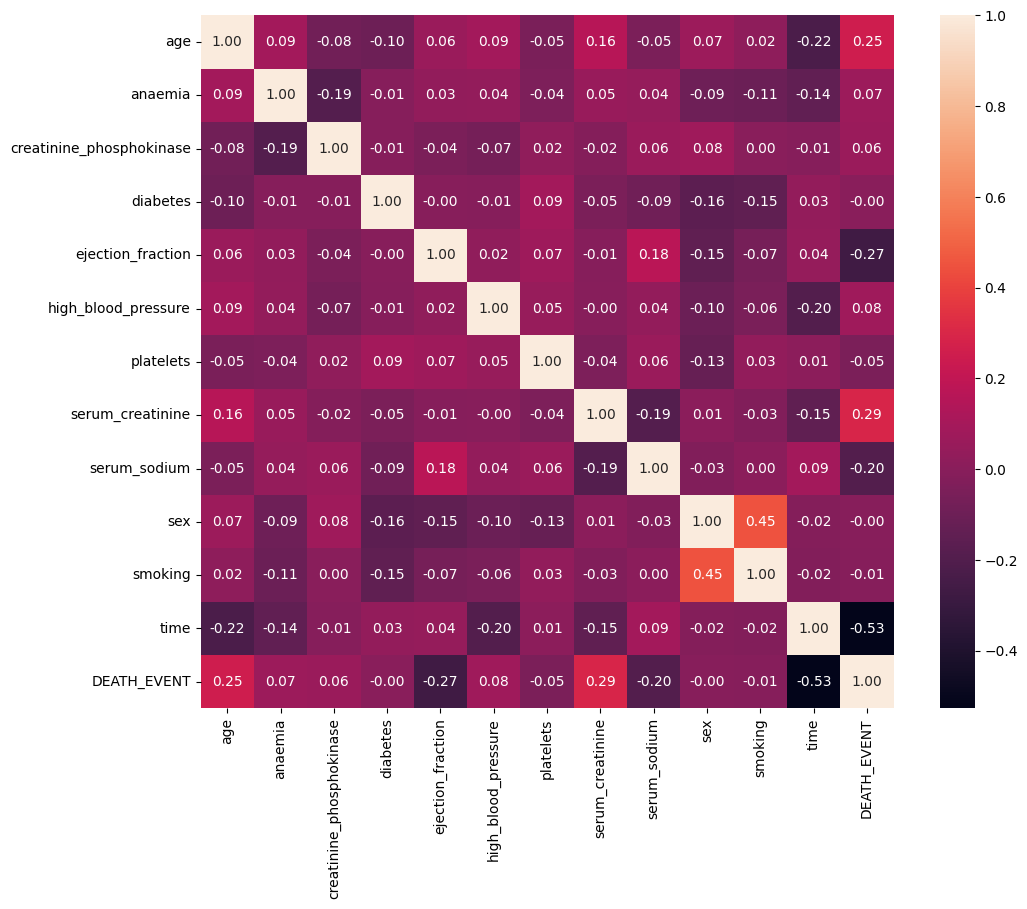

In [26]:
correlation_mat = heartdf.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(correlation_mat, vmax= 1, annot = True, square = True, fmt= ".2f")

Since there are some factors that have negative correlations (<0.00) with DEATH_EVENT, we will remove drop those data columns as they are not necessary.

In [27]:
heartdf.drop("ejection_fraction", axis = 1, inplace = True)
heartdf.drop("platelets", axis = 1, inplace = True)
heartdf.drop("serum_sodium", axis = 1, inplace = True)
heartdf.drop("time", axis = 1, inplace = True)
heartdf.drop("smoking", axis = 1, inplace = True)
heartdf

,age,anaemia,creatinine_phosphokinase,diabetes,high_blood_pressure,serum_creatinine,sex,DEATH_EVENT
0,75.0,0,582,0,1,1.9,1,1
1,55.0,0,7861,0,0,1.1,1,1
2,65.0,0,146,0,0,1.3,1,1
3,50.0,1,111,0,0,1.9,1,1
4,65.0,1,160,1,0,2.7,0,1
...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,1,1.1,1,0
295,55.0,0,1820,0,0,1.2,0,0
296,45.0,0,2060,1,0,0.8,0,0
297,45.0,0,2413,0,0,1.4,1,0


In [28]:
#Extract the attributes into a list
def extract_df_col(df):
    df = df.copy()
    class_column = df.pop('DEATH_EVENT')
    df['DEATH_EVENT'] = class_column
    record_list = []
    for col in df.columns:
        record_list.append(col)
    print(record_list)
    return(record_list)

In [29]:
heart_list = extract_df_col(heartdf)
with open("datasets\Heart Failure Clinical Records\cleaned_attributes.txt", "w") as output:
    output.write(str(heart_list))


['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'serum_creatinine', 'sex', 'DEATH_EVENT']


## Create training and testing sets for prediction

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
dectree = DecisionTreeClassifier()

In [31]:
y = heartdf["DEATH_EVENT"]
x = heartdf.drop("DEATH_EVENT", axis = 1)


In [32]:
# Split 224 Training and 75 Testing samples
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size = 0.25, random_state = 2)

print("Train set: \t", xTrain.shape,yTrain.shape)
print("Test set: \t", xTest.shape,yTest.shape)

Train set: 	 (224, 7) (224,)
Test set: 	 (75, 7) (75,)


### Classification Decision Tree Method

In [33]:
dectree.fit(xTrain,yTrain)

DecisionTreeClassifier()

In [34]:
train_pred = dectree.predict(xTest)
print(train_pred)

[0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0
 0]


In [35]:
heartDisease_dt_df = pd.DataFrame(data = train_pred, columns = ["DEATH_EVENT"])
heartDisease_dt_df.head(15)

,DEATH_EVENT
0,0
1,0
2,0
3,0
4,0
5,1
6,1
7,0
8,1
9,0


In [36]:
print("Classification Accuracy \t: ", dectree.score(xTrain,yTrain))

Classification Accuracy 	:  1.0


In [37]:
print("Classification Accuracy \t: ", dectree.score(xTest,yTest))

Classification Accuracy 	:  0.7066666666666667


In [38]:
dtAccuracy = accuracy_score(yTest,train_pred)
dtFscore = f1_score(yTest,train_pred)
print(f"The accuracy of Decision Tree is {dtAccuracy}")
print(f"The F score of Decision Tree is {dtFscore}")

The accuracy of Decision Tree is 0.7066666666666667
The F score of Decision Tree is 0.45


In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yTest,train_pred)
cm

array([[44, 10],
       [12,  9]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

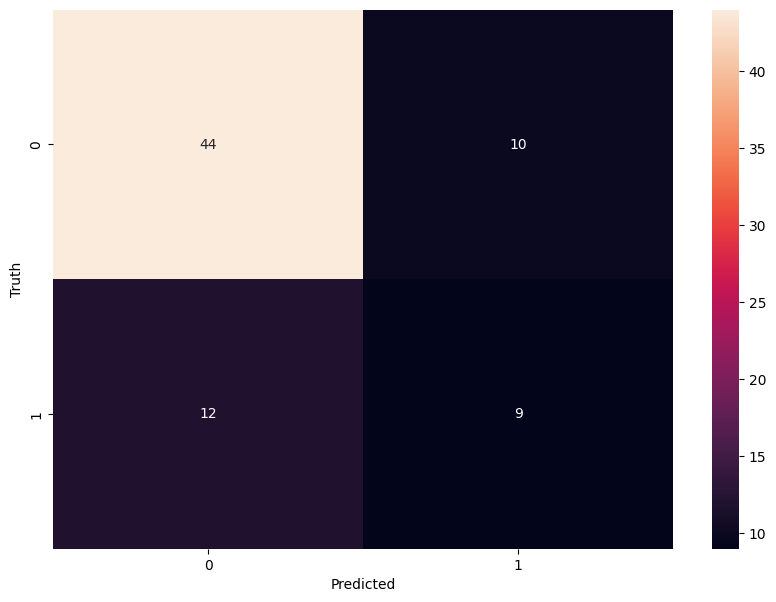

In [40]:
%matplotlib inline
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [41]:
xTestDF = xTest.copy()
xTestDF.insert(len(xTestDF.columns), "yTest DEATH_EVENT", yTest)
xTestDF = xTestDF.reset_index(drop=True)
xTestDF.head(15)

,age,anaemia,creatinine_phosphokinase,diabetes,high_blood_pressure,serum_creatinine,sex,yTest DEATH_EVENT
0,55.0,0,835,0,0,0.70,1,0
1,65.0,0,118,0,0,1.10,1,0
2,58.0,1,57,0,0,1.30,1,0
3,60.0,1,315,1,0,1.10,1,1
4,50.0,1,115,0,0,0.80,1,0
5,94.0,0,582,1,1,1.83,1,1
6,75.0,0,99,0,1,2.50,1,1
7,59.0,1,176,1,0,1.00,1,1
8,51.0,0,582,1,0,0.90,0,0
9,46.0,1,291,0,0,0.90,0,0


In [42]:
xTestDF.insert(len(xTestDF.columns), "Decision Tree", heartDisease_dt_df)
xTestDF.head(20)

,age,anaemia,creatinine_phosphokinase,diabetes,high_blood_pressure,serum_creatinine,sex,yTest DEATH_EVENT,Decision Tree
0,55.0,0,835,0,0,0.70,1,0,0
1,65.0,0,118,0,0,1.10,1,0,0
2,58.0,1,57,0,0,1.30,1,0,0
3,60.0,1,315,1,0,1.10,1,1,0
4,50.0,1,115,0,0,0.80,1,0,0
5,94.0,0,582,1,1,1.83,1,1,1
6,75.0,0,99,0,1,2.50,1,1,1
7,59.0,1,176,1,0,1.00,1,1,0
8,51.0,0,582,1,0,0.90,0,0,1
9,46.0,1,291,0,0,0.90,0,0,0


### Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier


index : 46 
Accuracy : 0.8133333333333334


Text(0, 0.5, 'Testing Accuracy')

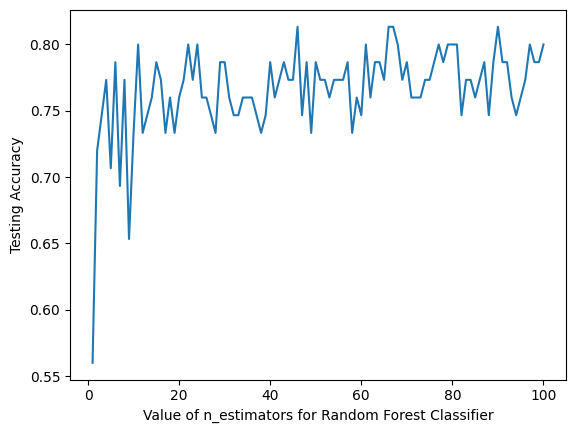

In [44]:
scores =[]
maxAccuracy = 0
maxIndex = 0
#To enumerate up to a 100 to find the best n value
for i,k in enumerate(range(1, 101)):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(xTrain, yTrain)
    rf_pred = rfc.predict(xTest)
    scores.append(accuracy_score(yTest, rf_pred))

for i, x in enumerate(scores):
    if i == 0:
        maxAccuracy = x
        maxIndex = i+1
    if x > maxAccuracy:
        maxAccuracy = x
        maxIndex = i+1

print(f"index : {maxIndex} \nAccuracy : {maxAccuracy}")

import matplotlib.pyplot as plt
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(range(1, 101), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

In [45]:
model = RandomForestClassifier(n_estimators=maxIndex)
model.fit(xTrain,yTrain)

RandomForestClassifier(n_estimators=46)

In [46]:
model.score(xTest,yTest)

0.7733333333333333

In [47]:
yPredicted = model.predict(xTest)

In [48]:
rfAccuracy = accuracy_score(yTest,yPredicted)
rfFscore = f1_score(yTest,yPredicted)
print(f"The accuracy of Random Forest is {rfAccuracy}")
print(f"The F score of Random Forest is {rfFscore}")

The accuracy of Random Forest is 0.7733333333333333
The F score of Random Forest is 0.4848484848484849


In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yTest,yPredicted)
cm

array([[50,  4],
       [13,  8]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

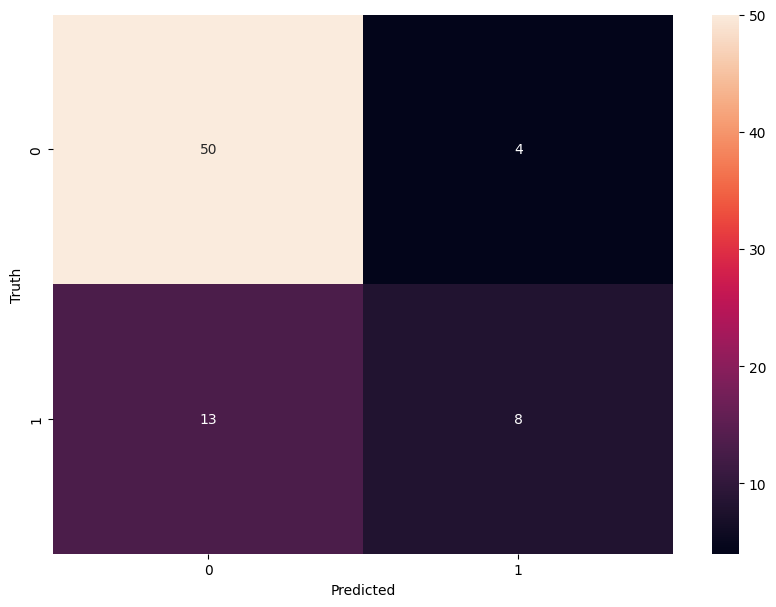

In [50]:
%matplotlib inline
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [51]:
heartDisease_rf_df = pd.DataFrame(data = yPredicted, columns = ["DEATH_EVENT"])
heartDisease_rf_df.head(15)

,DEATH_EVENT
0,0
1,0
2,0
3,0
4,0
5,1
6,1
7,0
8,0
9,0


In [52]:
xTestDF.insert(len(xTestDF.columns), "Random Forest", heartDisease_rf_df)
xTestDF.head(20)

,age,anaemia,creatinine_phosphokinase,diabetes,high_blood_pressure,serum_creatinine,sex,yTest DEATH_EVENT,Decision Tree,Random Forest
0,55.0,0,835,0,0,0.70,1,0,0,0
1,65.0,0,118,0,0,1.10,1,0,0,0
2,58.0,1,57,0,0,1.30,1,0,0,0
3,60.0,1,315,1,0,1.10,1,1,0,0
4,50.0,1,115,0,0,0.80,1,0,0,0
5,94.0,0,582,1,1,1.83,1,1,1,1
6,75.0,0,99,0,1,2.50,1,1,1,1
7,59.0,1,176,1,0,1.00,1,1,0,0
8,51.0,0,582,1,0,0.90,0,0,1,0
9,46.0,1,291,0,0,0.90,0,0,0,0


### K-Nearest-Neighbour Classification

In [53]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

#Finding the optimal k from 1-30
kRange = range(1,31)

scores = []

for kValue in kRange:
    knnClass = KNeighborsClassifier(n_neighbors = kValue)
    knnClass.fit(xTrain,yTrain)
    yPredicted= knnClass.predict(xTest)
    scores.append(metrics.accuracy_score(yTest,yPredicted))
    
maxKAccuracy = 0
maxKValue = 0

for i, x in enumerate(scores):
    if i == 0:
        maxKAccuracy = x
        maxKValue = i+1
    if x > maxKAccuracy:
        maxKAccuracy = x
        maxKValue = i+1

print(f"K value : {maxKValue} \nAccuracy : {maxKAccuracy}")


K value : 14 
Accuracy : 0.7066666666666667


Text(0, 0.5, 'Testing Accuracy')

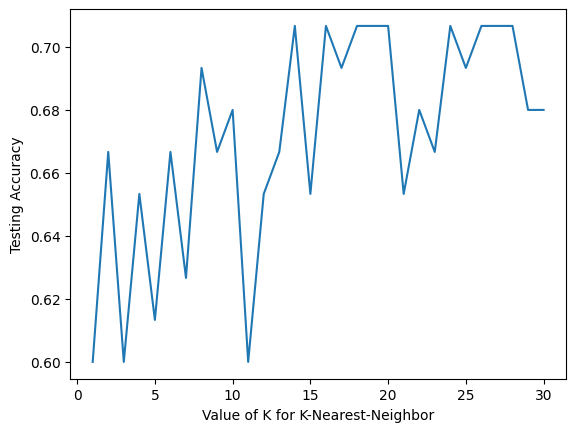

In [54]:
%matplotlib inline

plt.plot(kRange,scores)
plt.xlabel("Value of K for K-Nearest-Neighbor")
plt.ylabel("Testing Accuracy")

KNN Classifier with K value = maxKValue is selected as it yields the highest testing accuracy with a low K value

In [55]:
knnClass = KNeighborsClassifier(n_neighbors = maxKValue)
knnClass.fit(xTrain,yTrain)

KNeighborsClassifier(n_neighbors=14)

In [56]:
knnPredicted = knnClass.predict(xTest)
print(knnPredicted)

[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0]


In [57]:
knnAccuracy = accuracy_score(yTest,knnPredicted)
knnFscore = f1_score(yTest,knnPredicted)
print(f"The accuracy of K-Nearest-Neighbour is {knnAccuracy}")
print(f"The F score of K-Nearest-Neighbour is {knnFscore}")

The accuracy of K-Nearest-Neighbour is 0.7066666666666667
The F score of K-Nearest-Neighbour is 0.15384615384615385


In [58]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yTest,knnPredicted)
cm

array([[51,  3],
       [19,  2]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

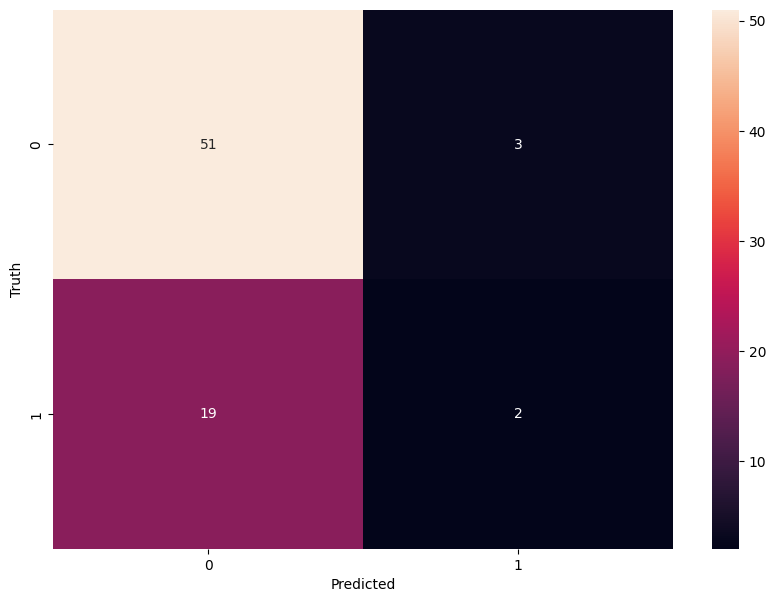

In [59]:
%matplotlib inline
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [60]:
knnPredictedDF = pd.DataFrame(data = knnPredicted, columns = ["DEATH_EVENT"])
knnPredictedDF.head(10)


,DEATH_EVENT
0,0
1,0
2,0
3,0
4,0
5,1
6,0
7,0
8,0
9,0


In [61]:
xTestDF.insert(len(xTestDF.columns), "K-Nearest-Neighbors", knnPredictedDF)
xTestDF.head(20)

,age,anaemia,creatinine_phosphokinase,diabetes,high_blood_pressure,serum_creatinine,sex,yTest DEATH_EVENT,Decision Tree,Random Forest,K-Nearest-Neighbors
0,55.0,0,835,0,0,0.70,1,0,0,0,0
1,65.0,0,118,0,0,1.10,1,0,0,0,0
2,58.0,1,57,0,0,1.30,1,0,0,0,0
3,60.0,1,315,1,0,1.10,1,1,0,0,0
4,50.0,1,115,0,0,0.80,1,0,0,0,0
5,94.0,0,582,1,1,1.83,1,1,1,1,1
6,75.0,0,99,0,1,2.50,1,1,1,1,0
7,59.0,1,176,1,0,1.00,1,1,0,0,0
8,51.0,0,582,1,0,0.90,0,0,1,0,0
9,46.0,1,291,0,0,0.90,0,0,0,0,0


### Support Vector Machines

In [62]:
from sklearn import svm
clf = svm.SVC(kernel = "rbf",random_state = 1)
clf.fit(xTrain,yTrain)

SVC(random_state=1)

In [63]:
svm_pred = clf.predict(xTest)
print(svm_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]


In [64]:
svmAccuracy = accuracy_score(yTest,svm_pred)
svmFscore = f1_score(yTest,svm_pred,average = "weighted")
print(f"The accuracy of Support Vector Machines is {svmAccuracy}")
print(f"The F score of Support Vector Machines is {svmFscore}")

The accuracy of Support Vector Machines is 0.6933333333333334
The F score of Support Vector Machines is 0.5896062992125984


In [65]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yTest,svm_pred)
cm

array([[52,  2],
       [21,  0]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

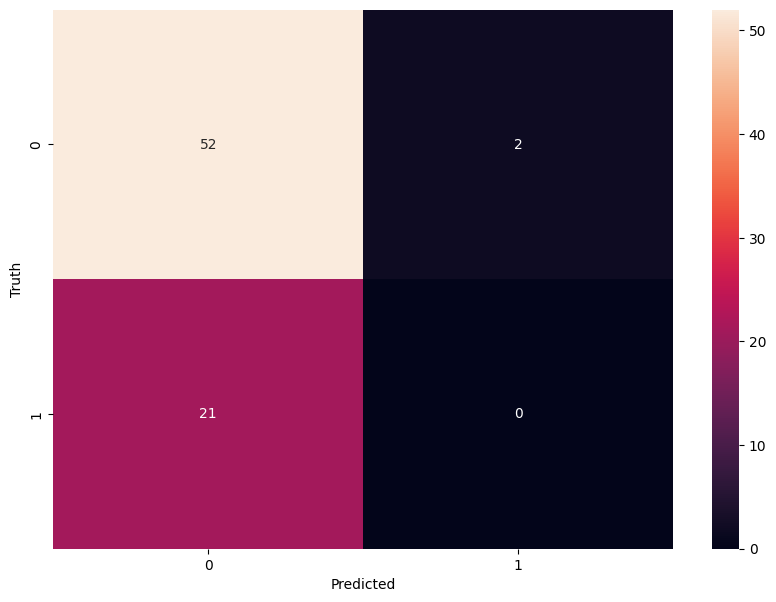

In [66]:
%matplotlib inline
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [67]:
heart_svm_df = pd.DataFrame(data = svm_pred, columns = ["DEATH_EVENT"])
heart_svm_df.head(15)

,DEATH_EVENT
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [68]:
xTestDF.insert(len(xTestDF.columns), "Support Vector Machines", heart_svm_df)
xTestDF.head(20)

,age,anaemia,creatinine_phosphokinase,diabetes,high_blood_pressure,serum_creatinine,sex,yTest DEATH_EVENT,Decision Tree,Random Forest,K-Nearest-Neighbors,Support Vector Machines
0,55.0,0,835,0,0,0.70,1,0,0,0,0,0
1,65.0,0,118,0,0,1.10,1,0,0,0,0,0
2,58.0,1,57,0,0,1.30,1,0,0,0,0,0
3,60.0,1,315,1,0,1.10,1,1,0,0,0,0
4,50.0,1,115,0,0,0.80,1,0,0,0,0,0
5,94.0,0,582,1,1,1.83,1,1,1,1,1,0
6,75.0,0,99,0,1,2.50,1,1,1,1,0,0
7,59.0,1,176,1,0,1.00,1,1,0,0,0,0
8,51.0,0,582,1,0,0.90,0,0,1,0,0,0
9,46.0,1,291,0,0,0.90,0,0,0,0,0,0


### Neural Network

In [69]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver = "lbfgs", alpha = 1e-5, 
                    hidden_layer_sizes =(4,), random_state=1, max_iter = 1000)
clf.fit(xTrain,yTrain)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(4,), max_iter=1000,
              random_state=1, solver='lbfgs')

In [70]:
nn_pred = clf.predict(xTest)
print(nn_pred)

[0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]


In [71]:
nnAccuracy = accuracy_score(yTest,nn_pred)
nnFscore = f1_score(yTest,nn_pred,average = "weighted")
print(f"The accuracy of Neutral Network is {nnAccuracy}")
print(f"The F score of Neural Network is {nnFscore}")

The accuracy of Neutral Network is 0.76
The F score of Neural Network is 0.7137704918032787


In [72]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yTest,nn_pred)
cm

array([[52,  2],
       [16,  5]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

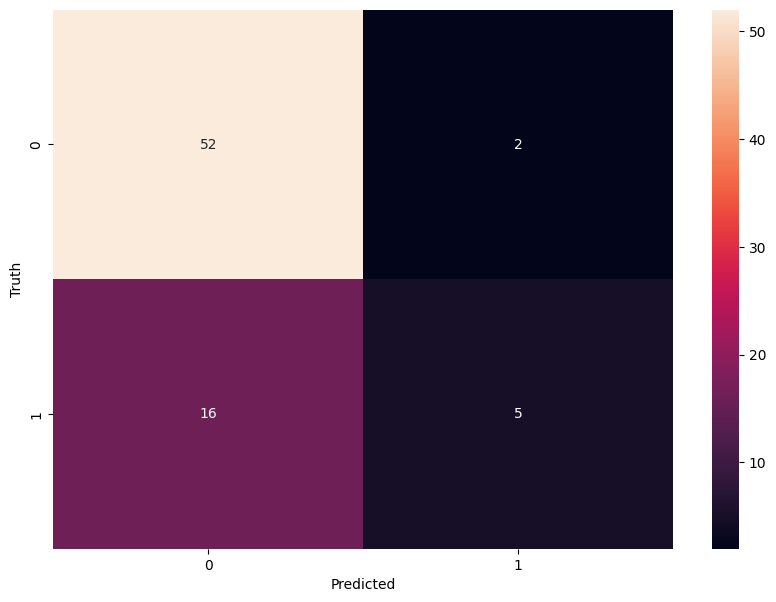

In [73]:
%matplotlib inline
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [74]:
heart_nn_df = pd.DataFrame(data = nn_pred, columns = ["DEATH_EVENT"])
heart_nn_df.head(15)

,DEATH_EVENT
0,0
1,0
2,0
3,0
4,0
5,1
6,1
7,0
8,0
9,0


# Evaluation Metrics of the Machine Learning algorithms

In [75]:
dfMetrics = pd.DataFrame({ "KNN" : [knnAccuracy, knnFscore],
                   "Random Forest" : [rfAccuracy, rfFscore],
                   "Decision Tree" : [dtAccuracy, dtFscore], 
                   "SVM" : [svmAccuracy,svmFscore],
                   "NN" : [nnAccuracy,nnFscore]} , columns = ["KNN" , "Random Forest" , "Decision Tree", "SVM", "NN"], 
                  index = ["Accuracy", "Fscore"])
dfMetrics

,KNN,Random Forest,Decision Tree,SVM,NN
Accuracy,0.706667,0.773333,0.706667,0.693333,0.76000
Fscore,0.153846,0.484848,0.450000,0.589606,0.71377
